# Moving Averages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,41.135757,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,41.128597,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.319630,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.790058,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.634846,82271200


In [3]:
n = 7
df['Moving_Averages'] = df['Adj Close'].rolling(n).mean()

In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Moving_Averages
Date,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,41.135757,102223600,NaN
2018-01-03,43.132500,43.637501,42.990002,43.057499,41.128597,118071600,NaN
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.319630,89738400,NaN
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.790058,94640000,NaN
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.634846,82271200,NaN


In [8]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Moving_Averages
Date,,,,,,,
2018-12-24,37.037498,37.887501,36.647499,36.707500,35.589470,148676800,38.462084
2018-12-26,37.075001,39.307499,36.680000,39.292500,38.095741,234330000,38.174338
2018-12-27,38.959999,39.192501,37.517502,39.037498,37.848499,212468400,37.904597
2018-12-28,39.375000,39.630001,38.637501,39.057499,37.867893,169165600,37.563873
2018-12-31,39.632500,39.840000,39.119999,39.435001,38.233898,140014000,37.454800


Text(0.5, 0, 'Date')

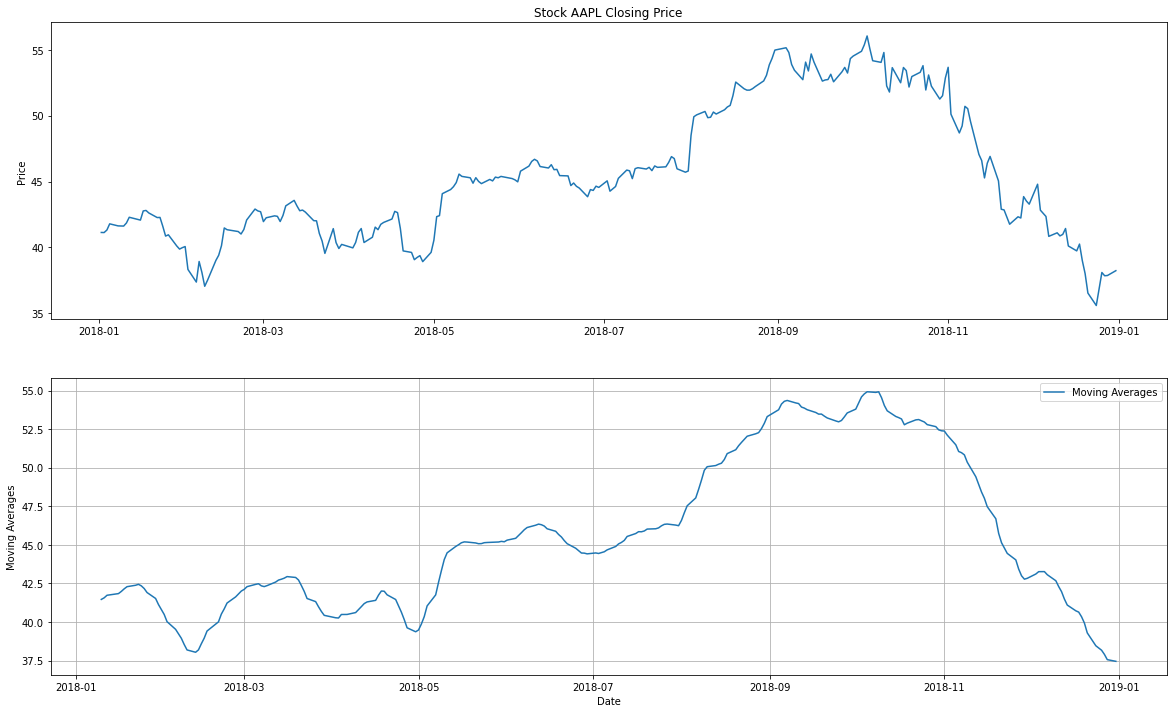

In [4]:
fig = plt.figure(figsize=(20,12))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Moving_Averages'], label='Moving Averages')
ax2.grid()
ax2.set_ylabel('Moving Averages')
ax2.legend(loc='best')
ax2.set_xlabel('Date')

## Candlestick with Moving Averages

In [5]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Moving_Averages,VolumePositive
0,17533.0,42.540001,43.075001,42.314999,43.064999,41.135757,102223600,NaN,False
1,17534.0,43.132500,43.637501,42.990002,43.057499,41.128597,118071600,NaN,False
2,17535.0,43.134998,43.367500,43.020000,43.257500,41.319630,89738400,NaN,False
3,17536.0,43.360001,43.842499,43.262501,43.750000,41.790058,94640000,NaN,False
4,17539.0,43.587502,43.902500,43.482498,43.587502,41.634846,82271200,NaN,False


Text(0.5, 0, 'Date')

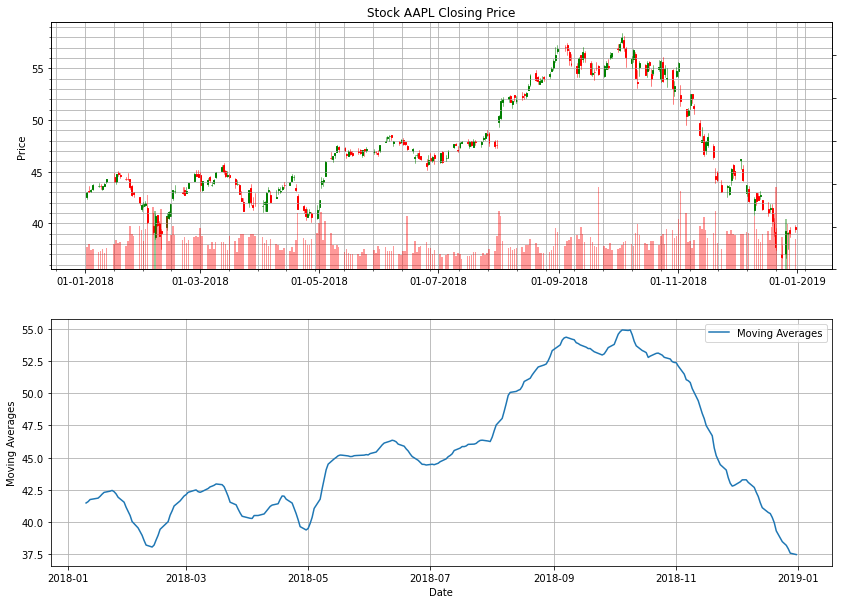

In [6]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Moving_Averages'], label='Moving Averages')
ax2.grid()
ax2.set_ylabel('Moving Averages')
ax2.legend(loc='best')
ax2.set_xlabel('Date')